In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
data = pd.read_excel ("Customer+Churn+Data.xlsx")

In [7]:
data

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer


In [9]:
data.tail(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11250,31250,0,3,1.0,40.0,Credit Card,Female,4.0,5,Regular Plus,5.0,Single,5,0.0,17,1,5,164.85,Mobile
11251,31251,1,14,3.0,37.0,E wallet,Male,3.0,5,HNI,5.0,Married,9,1.0,14,3,NaN,240.54,Mobile
11252,31252,0,13,3.0,33.0,E wallet,Female,3.0,NaN,Super Plus,1.0,Married,4,0.0,12,4,7,252.31,Mobile
11253,31253,0,5,1.0,17.0,Credit Card,Male,4.0,4,Super,5.0,Single,3,0.0,20,2,8,227.36,Computer
11254,31254,0,1,3.0,19.0,UPI,Female,2.0,5,Regular Plus,3.0,Single,4,0.0,19,2,1,157.66,Mobile
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [13]:
data.shape

(11260, 19)

In [15]:
data['Tenure'].value_counts()

Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: count, dtype: int64

In [17]:
data.describe(include="all")['Tenure']

count     11158.0
unique       38.0
top           1.0
freq       1351.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Tenure, dtype: float64

In [19]:

data['Tenure'] = pd.to_numeric(data['Tenure'], errors='coerce')

# Assuming 'data' is your DataFrame
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean()).astype(int)
data.describe(include="all")['Tenure']

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean         11.024600
std          12.754482
min           0.000000
25%           2.000000
50%           9.000000
75%          16.000000
max          99.000000
Name: Tenure, dtype: float64

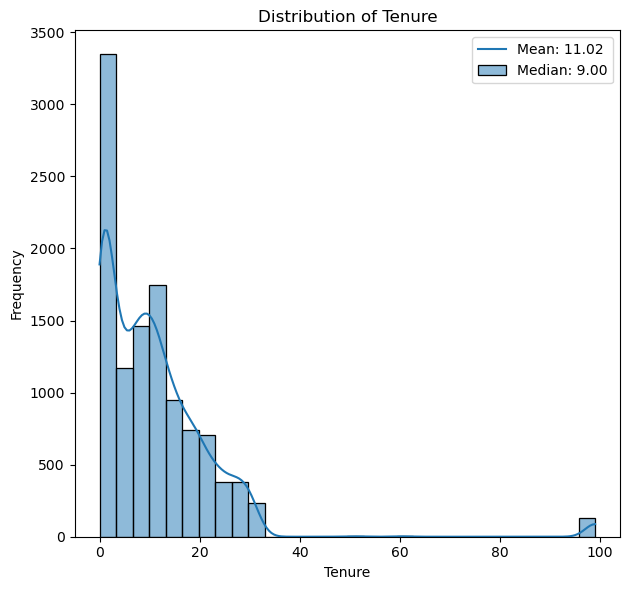

In [21]:
# Assuming 'data' is your DataFrame
# Calculate descriptive statistics
mean_tenure = data['Tenure'].mean()
median_tenure = data['Tenure'].median()
mode_tenure = data['Tenure'].mode()[0]
max_tenure = data['Tenure'].max()
min_tenure = data['Tenure'].min()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')


# Adding legend with statistics
plt.subplot(1, 2, 1)  # Add legend to the histogram
plt.legend([
    f'Mean: {mean_tenure:.2f}',
    f'Median: {median_tenure:.2f}',
    f'Mode: {mode_tenure:.2f}',
    f'Highest Tenure: {max_tenure}',
    f'Lowest Tenure: {min_tenure}'], loc='upper right')

plt.tight_layout()
plt.show()

In [23]:
data['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [25]:
data.describe()['Churn']

count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64

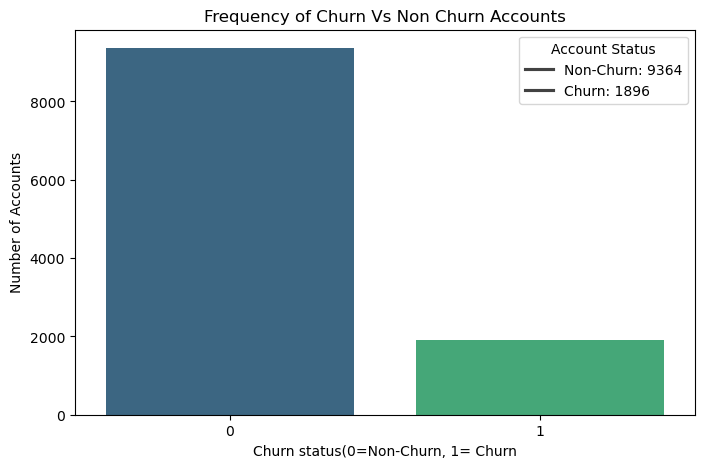

In [27]:
churn_counts = data['Churn'].value_counts()
plt.figure(figsize=(8,5))

bar_plot = sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette='viridis', legend=False)
plt.title('Frequency of Churn Vs Non Churn Accounts')
plt.xlabel('Churn status(0=Non-Churn, 1= Churn')
plt.ylabel('Number of Accounts')
plt.xticks(ticks=[0,1],label = ['Non-Churn','Churn'])

non_churn_count = churn_counts[0]
churn_count = churn_counts[1]
legend_text =[f'Non-Churn: {non_churn_count}', f'Churn: {churn_count}']

plt.legend(legend_text, title ='Account Status', loc = 'upper right')

plt.show()

In [29]:
data['CC_Contacted_LY'].value_counts()

CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: count, dtype: int64

In [31]:
data.describe(include="all")['CC_Contacted_LY']

count     11158.000000
unique             NaN
top                NaN
freq               NaN
mean         17.867091
std           8.853269
min           4.000000
25%          11.000000
50%          16.000000
75%          23.000000
max         132.000000
Name: CC_Contacted_LY, dtype: float64

In [33]:
missing_values = data['CC_Contacted_LY'].isnull().sum()

# Step 2: Convert data type if necessary
data['CC_Contacted_LY'] = pd.to_numeric(data['CC_Contacted_LY'], errors='coerce')

data.describe(include="all")['CC_Contacted_LY']

count     11158.000000
unique             NaN
top                NaN
freq               NaN
mean         17.867091
std           8.853269
min           4.000000
25%          11.000000
50%          16.000000
75%          23.000000
max         132.000000
Name: CC_Contacted_LY, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_2152\1197469796.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')


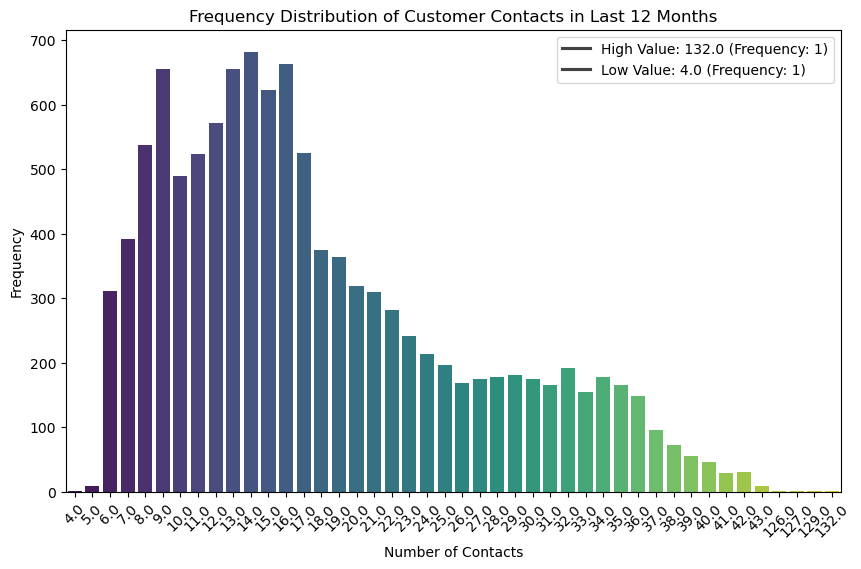

In [35]:
# data and CC_Contacted_LY is the relevant column
# Create a frequency distribution
frequency_distribution = data['CC_Contacted_LY'].value_counts().sort_index()

# Calculate high and low values and their frequencies
high_value = frequency_distribution.index.max()
low_value = frequency_distribution.index.min()
high_value_freq = frequency_distribution[high_value]
low_value_freq = frequency_distribution[low_value]

# Plotting the frequency distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')
plt.title('Frequency Distribution of Customer Contacts in Last 12 Months')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding high and low values with their frequencies to the legend
plt.legend([f'High Value: {high_value} (Frequency: {high_value_freq})', 
            f'Low Value: {low_value} (Frequency: {low_value_freq})'], loc='upper right')

plt.show()

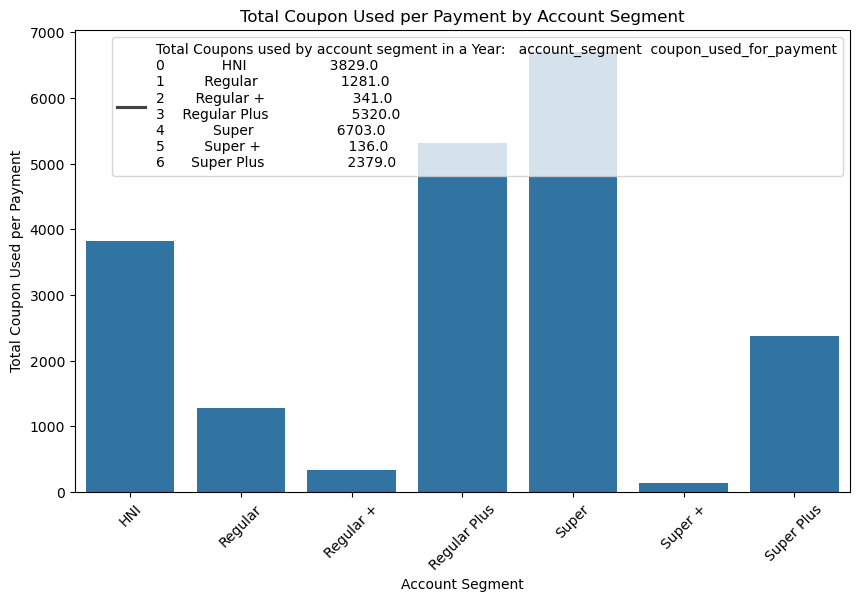

In [37]:
# Assuming 'data' is your DataFrame
# Convert 'coupon_used_for_payment' to numeric, forcing errors to NaN
data['coupon_used_for_payment'] = pd.to_numeric(data['coupon_used_for_payment'], errors='coerce')

# Group by account_segment and calculate the total of coupon_used_for_payment
coupon_usage = data.groupby('account_segment')['coupon_used_for_payment'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='account_segment', y='coupon_used_for_payment', data=coupon_usage)
plt.title('Total Coupon Used per Payment by Account Segment')
plt.xlabel('Account Segment')
plt.ylabel('Total Coupon Used per Payment')
plt.xticks(rotation=45)
plt.legend([f'Total Coupons used by account segment in a Year: {coupon_usage}'])
plt.show()

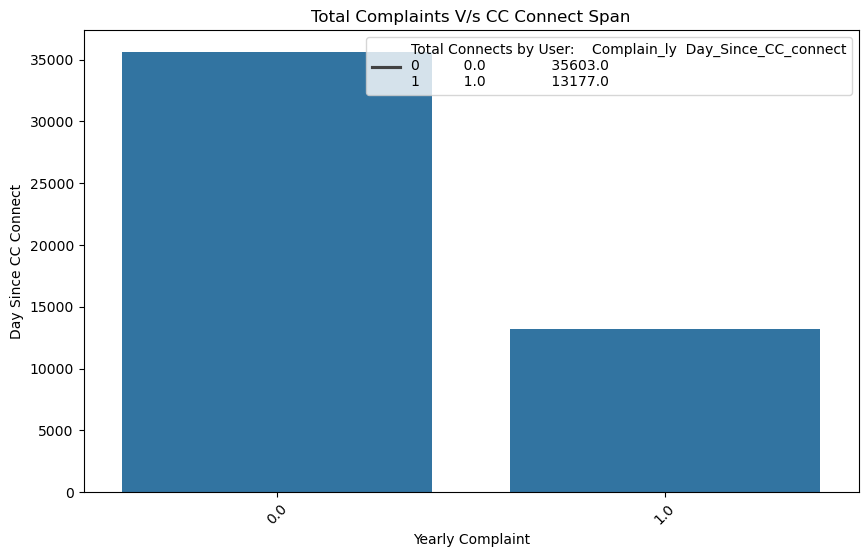

In [39]:
# Assuming 'data' is your DataFrame containing the 'Day_Since_CC_connect' column
# data = pd.read_csv('your_data_file.csv')  # Load your data

# Calculate the average days since last contact
data['Day_Since_CC_connect'] = pd.to_numeric(data['Day_Since_CC_connect'], errors='coerce')
CC_Connect = data.groupby('Complain_ly')['Day_Since_CC_connect'].sum().reset_index()

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Complain_ly', y='Day_Since_CC_connect', data=CC_Connect)
plt.title('Total Complaints V/s CC Connect Span')
plt.xlabel('Yearly Complaint')
plt.ylabel('Day Since CC Connect')
plt.xticks(rotation=45)
plt.legend([f'Total Connects by User: {CC_Connect}'])
plt.show()

In [41]:
data['Gender'].value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [43]:

data["Gender"] = data["Gender"].apply(lambda x: str(x).replace("Female", "F"))  # Convert to string before replacing

data["Gender"] = data["Gender"].astype("object")  # Convert to float after replacing
data.describe(include="all")["Gender"]  # Get the description of the "Tenure" column

count     11260
unique        4
top        Male
freq       6328
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object

In [45]:

data["Gender"] = data["Gender"].apply(lambda x: str(x).replace("Male", "M"))  # Convert to string before replacing

data["Gender"] = data["Gender"].astype("object")  # Convert to object after replacing
data.describe(include="all")["Gender"]  # Get the description of the "Gender" column

count     11260
unique        3
top           M
freq       6704
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Gender, dtype: object

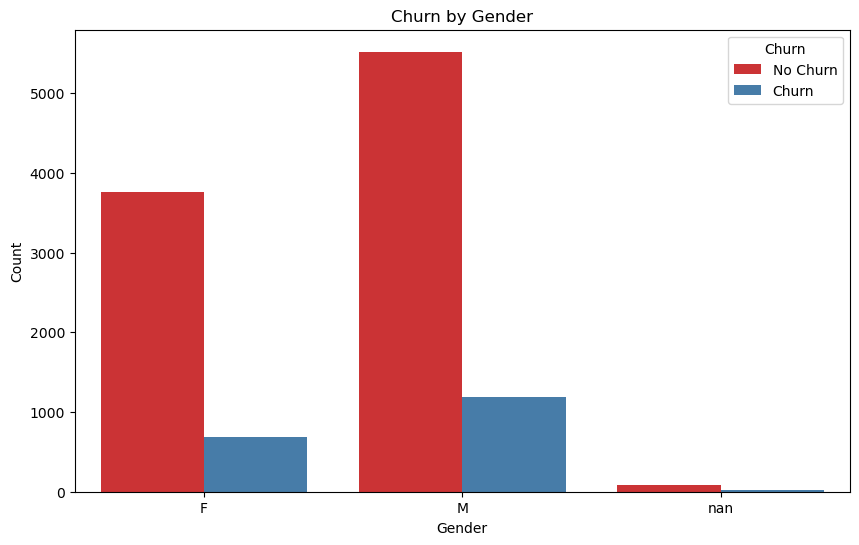

In [47]:

# Assuming 'data' is your DataFrame
# Convert Gender and Churn to categorical if they are not already
data['Gender'] = data['Gender'].astype('category')
data['Churn'] = data['Churn'].astype('category')

# Create a count plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Churn', palette='Set1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

In [49]:
data['City_Tier'].value_counts()

City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64

In [51]:
data.describe()['City_Tier']

count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64

In [55]:
# Show account segment values before replacement  
print("Account Segment values before replacement:")  
print(data['account_segment'].unique())  

# Replace values in the Account_Segment column  
data['account_segment'] = data['account_segment'].replace({  
    'Super +': 'Super Plus',  
    'Regular +': 'Regular Plus'  
})  

# Show account segment values after replacement  
print("\nAccount Segment values after replacement:")  
print(data['account_segment'].unique())  

# If you'd like to save the modified DataFrame back to CSV, uncomment the following line:  
# data.to_csv('modified_dataset.csv', index=False)  # Replace 'modified_dataset.csv' with your desired filename

Account Segment values before replacement:
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']

Account Segment values after replacement:
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']


In [59]:
data.describe(include="all")['account_segment']

count            11163
unique               5
top       Regular Plus
freq              4124
mean               NaN
std                NaN
min                NaN
25%                NaN
50%                NaN
75%                NaN
max                NaN
Name: account_segment, dtype: object

In [61]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

Unique values in City_Tier:
[ 3.  1. nan  2.]

Unique values in account_segment:
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']

Contingency Table:
account_segment  HNI  Regular  Regular Plus  Super  Super Plus
City_Tier                                                     
1.0              956      363          3250   2109         528
2.0               47       51           258     93          28
3.0              619       99           578   1817         255


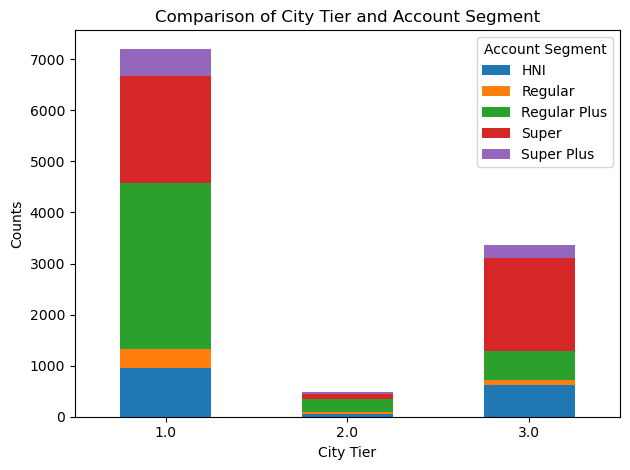

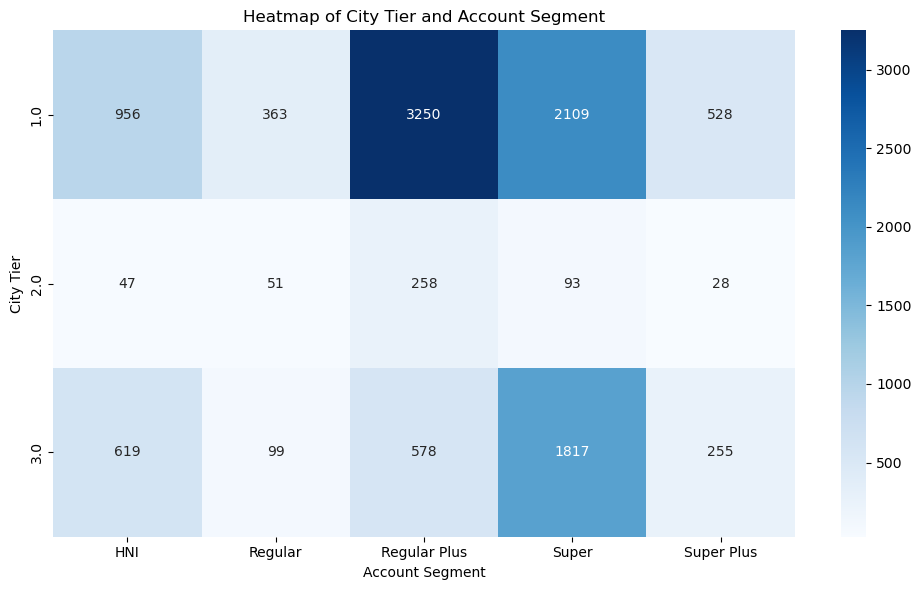

In [63]:
# Display unique values of City_Tier and Account_Segment  
print("Unique values in City_Tier:")  
print(data['City_Tier'].unique())  
print("\nUnique values in account_segment:")  
print(data['account_segment'].unique())  

# Create a contingency table  
contingency_table = pd.crosstab(data['City_Tier'], data['account_segment'])  
print("\nContingency Table:")  
print(contingency_table)  

# Plotting the comparison using a stacked bar plot  
contingency_table.plot(kind='bar', stacked=True)  
plt.title('Comparison of City Tier and Account Segment')  
plt.xlabel('City Tier')  
plt.ylabel('Counts')  
plt.legend(title='Account Segment')  
plt.xticks(rotation=0)  
plt.tight_layout()  # Adjust layout to fit everything  
plt.show()  

# Plotting the comparison using a heatmap  
plt.figure(figsize=(10, 6))  
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')  
plt.title('Heatmap of City Tier and Account Segment')  
plt.ylabel('City Tier')  
plt.xlabel('Account Segment')  
plt.tight_layout()  # Adjust layout to fit everything  
plt.show()